# Transfer Learning 실습

## Import modules

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## 하이퍼파라미터 정의

In [9]:
EPOCHS = 30

## 네트워크 구조 정의

In [3]:
def MyModel():
    feat = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                             include_top=False) # MobileNetV2에서 fully_connected_layer부분은 빼고 앞의 부분만 가져옴
    feat.trainable = False # pretrained model을 freeze시킴... 더이상 학습되지 않게 만듬
    
    seq = tf.keras.models.Sequential()
    seq.add(feat) # h x w x c
    seq.add(tf.keras.layers.GlobalAveragePooling2D()) # 1 x 1 x c
    seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return seq

## 데이터 불러오기 (Cats vs. Dogs)

In [4]:
split = tfds.Split.TRAIN.subsplit(weighted=(8,2))
dataset, meta = tfds.load('cats_vs_dogs',
                           split=list(split), ## train : test = 8:2 로 데이터 split
                           with_info=True, ## meta를 받아오겠다
                           as_supervised=True) ## label(y변수)도 받아오겠다

# dataset
train_ds, test_ds = dataset

## 데이터 확인하기

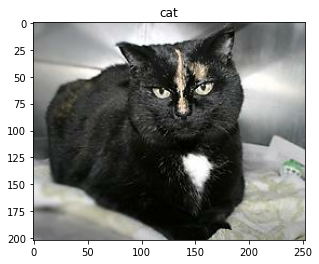

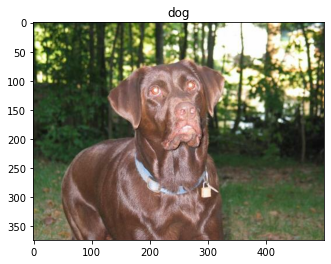

In [5]:
l2s = meta.features['label'].int2str
for img, label in test_ds.take(2):
    plt.figure()
    plt.imshow(img)
    plt.title(l2s(label))

## 데이터 가공하기
- 각 데이터의 크기가 다르다
- 모든 데이터(이미지)를 224 x 224로 만들어주자

In [6]:
def preprocess(img, label):
    img = tf.cast(img, tf.float32) / 255  ## 0 ~ 1로 normalize
    img = tf.image.resize(img, (224, 224)) # 크기는 224 x 224로 맞춰줌
    return img, label

train_ds = train_ds.map(preprocess).batch(32).prefetch(1024)
test_ds = test_ds.map(preprocess).batch(32).prefetch(1024)

## 모델 생성

In [7]:
model = MyModel()
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## 모델 학습

In [ ]:
model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/30
      2/Unknown - 43s 21s/step - loss: 0.6810 - accuracy: 0.6094